In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/onion_12_24_clean.csv')
df.head()

,District Name,Commodity,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Fazilka,Onion,450.0,650.0,500.0,02 Jan 2012
1,Fazilka,Onion,450.0,650.0,500.0,07 May 2012
2,Fazilka,Onion,450.0,650.0,500.0,11 May 2012
3,Fazilka,Onion,500.0,800.0,700.0,07 Aug 2012
4,Fazilka,Onion,500.0,800.0,700.0,26 Jul 2012


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638399 entries, 0 to 1638398
Data columns (total 6 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   District Name              1638399 non-null  object 
 1   Commodity                  1638399 non-null  object 
 2   Min Price (Rs./Quintal)    1638399 non-null  float64
 3   Max Price (Rs./Quintal)    1638399 non-null  float64
 4   Modal Price (Rs./Quintal)  1638399 non-null  float64
 5   Price Date                 1638399 non-null  object 
dtypes: float64(3), object(3)
memory usage: 75.0+ MB


In [ ]:
df.isnull().sum()

,0
District Name,0
Commodity,0
Min Price (Rs./Quintal),0
Max Price (Rs./Quintal),0
Modal Price (Rs./Quintal),0
Price Date,0


In [ ]:
# Ensure Price Date is in datetime format
df["Price Date"] = pd.to_datetime(df["Price Date"])

# Ensure `Modal Price (Rs./Quintal)` is numeric
df["Modal Price (Rs./Quintal)"] = pd.to_numeric(df["Modal Price (Rs./Quintal)"], errors="coerce")

# Drop rows where `Modal Price (Rs./Quintal)` is NaN (result of coercing errors)
df = df.dropna(subset=["Modal Price (Rs./Quintal)"])

# Extract year and month
df["Year"] = df["Price Date"].dt.year
df["Month"] = df["Price Date"].dt.month_name()

In [ ]:
df.head()

,District Name,Commodity,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,Year,Month
0,Fazilka,Onion,450.0,650.0,500.0,2012-01-02,2012,January
1,Fazilka,Onion,450.0,650.0,500.0,2012-05-07,2012,May
2,Fazilka,Onion,450.0,650.0,500.0,2012-05-11,2012,May
3,Fazilka,Onion,500.0,800.0,700.0,2012-08-07,2012,August
4,Fazilka,Onion,500.0,800.0,700.0,2012-07-26,2012,July


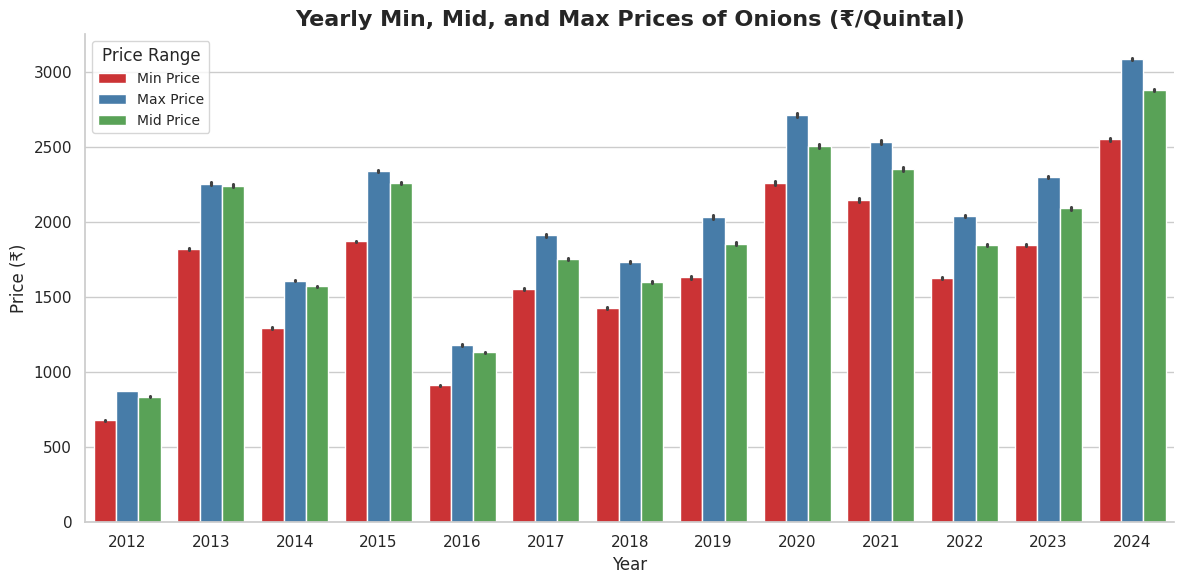

In [ ]:
# Reshape data for plotting
plot_data = df.melt(
    id_vars="Year",
    value_vars=["Min Price (Rs./Quintal)", "Max Price (Rs./Quintal)", "Modal Price (Rs./Quintal)"],
    var_name="Range",
    value_name="Price"
)

# Rename ranges for better readability
plot_data["Range"] = plot_data["Range"].replace({
    "Min Price (Rs./Quintal)": "Min Price",
    "Max Price (Rs./Quintal)": "Max Price",
    "Modal Price (Rs./Quintal)": "Mid Price"
})

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=plot_data, x="Year", y="Price", hue="Range", palette="Set1")
ax.set_title("Yearly Min, Mid, and Max Prices of Onions (₹/Quintal)", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Price (₹)", fontsize=12)
ax.legend(title="Price Range", fontsize=10)
sns.despine()

# Save the plot as an image file
plt.tight_layout()
plt.savefig("yearly_min_mid_max_prices.png", format="png", dpi=300)

# Display the plot
plt.show()

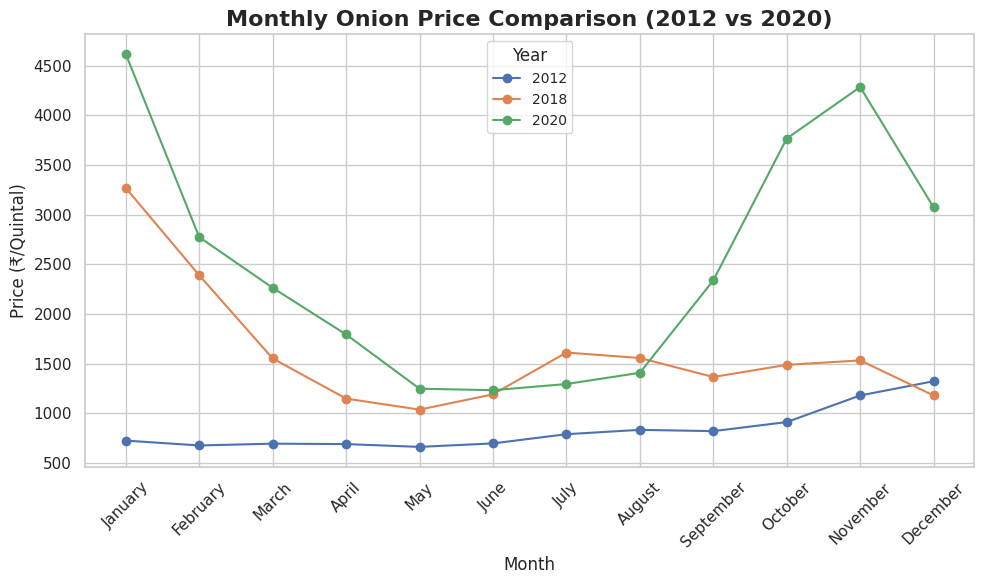

In [ ]:
# Filter for 2012 and 2020 data
df_filtered = df[df["Year"].isin([2012, 2018, 2020])]

# Group by year and month, calculate average modal price
monthly_prices = df_filtered.groupby(["Year", "Month"], sort=False)["Modal Price (Rs./Quintal)"].mean().reset_index()

# Pivot data for easy plotting
pivot_data = monthly_prices.pivot(index="Month", columns="Year", values="Modal Price (Rs./Quintal)")
pivot_data = pivot_data.reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])  # Ensure correct month order

# Plotting
plt.figure(figsize=(10, 6))
for year in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[year], label=str(year), marker='o')

# Add titles and labels
plt.title("Monthly Onion Price Comparison (2012 vs 2020)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Price (₹/Quintal)", fontsize=12)
plt.legend(title="Year", fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_price_range.png", format="png", dpi=300)

# Show the plot
plt.show()

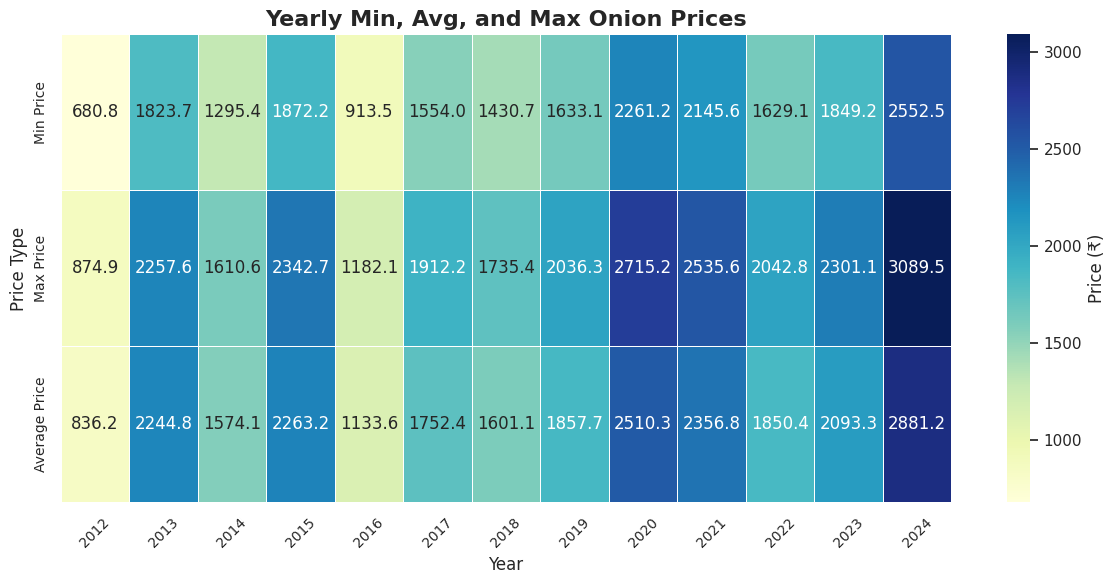

In [ ]:
# Group the data by year and calculate min, modal (avg), and max prices
grouped_data = df.groupby("Year").agg({
    "Min Price (Rs./Quintal)": "mean",
    "Max Price (Rs./Quintal)": "mean",
    "Modal Price (Rs./Quintal)": "mean"
}).reset_index()

# Reshape the data into a pivot table for heatmap-like visualization
pivot_data = grouped_data.set_index("Year").T
pivot_data.rename(index={
    "Min Price (Rs./Quintal)": "Min Price",
    "Max Price (Rs./Quintal)": "Max Price",
    "Modal Price (Rs./Quintal)": "Average Price"
}, inplace=True)

# Plot the heatmap table
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    pivot_data,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Price (₹)"}
)

# Adjust labels and title for clarity
ax.set_title("Yearly Min, Avg, and Max Onion Prices", fontsize=16, fontweight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Price Type", fontsize=12)

# Beautify the figure
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("yearly_min_mid_max_prices_table.png", format="png", dpi=300)

# Show the plot
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638399 entries, 0 to 1638398
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   District Name              1638399 non-null  object        
 1   Commodity                  1638399 non-null  object        
 2   Min Price (Rs./Quintal)    1638399 non-null  float64       
 3   Max Price (Rs./Quintal)    1638399 non-null  float64       
 4   Modal Price (Rs./Quintal)  1638399 non-null  float64       
 5   Price Date                 1638399 non-null  datetime64[ns]
 6   Year                       1638399 non-null  int32         
 7   Month                      1638399 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 93.8+ MB


In [ ]:
# sample year
df_2018 = df[df['Year'] == 2018]

# Reset the index for convenience
df_2018.reset_index(drop=True, inplace=True)

In [ ]:
# Add a 'Price Category' column (Low, Mid, High)
def categorize_price(price):
    if price < 1000:
        return 'Low'
    elif 1000 <= price <= 3000:
        return 'Mid'
    else:
        return 'High'

df_2018['Price Category'] = df_2018['Modal Price (Rs./Quintal)'].apply(categorize_price)

# Convert categorical columns to numeric using one-hot encoding
df_2018 = pd.get_dummies(df_2018, columns=['District Name', 'Month', 'Commodity'])
# pd.get_dummies is a function in the pandas library that converts categorical data into a
# format suitable for machine learning models by creating one-hot encoded columns.

# Split into features (X) and target (y)
X = df_2018.drop(columns=['Price Category', 'Price Date', 'Modal Price (Rs./Quintal)', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)'])
y = df_2018['Price Category']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df_2018.head()

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,Year,Price Category,District Name_Agra,District Name_Ahmedabad,District Name_Ahmednagar,District Name_Aizawl,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Commodity_Onion
0,550.0,950.0,750.0,2018-04-13,2018,Low,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,600.0,950.0,800.0,2018-05-22,2018,Low,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,700.0,1250.0,1050.0,2018-09-13,2018,Mid,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,750.0,1100.0,900.0,2018-10-01,2018,Low,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,750.0,1100.0,900.0,2018-09-26,2018,Low,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [ ]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93840 entries, 0 to 93839
Columns: 365 entries, Min Price (Rs./Quintal) to Commodity_Onion
dtypes: bool(359), datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 36.1+ MB


In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_knn) * 100))

KNN Accuracy: 84.77%


In [ ]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_nb) * 100))

Naïve Bayes Accuracy: 24.58%


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_dt) * 100))

Decision Tree Accuracy: 86.35%


In [ ]:
# svm
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_svm) * 100))

SVM Accuracy: 84.32%


In [ ]:
# neural network
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

print("Neural Network Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_nn) * 100))

Neural Network Accuracy: 80.27%


In [ ]:
# Data Preparation for LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Use 'Modal Price (Rs./Quintal)' for time series
price_data = df_2018[['Price Date', 'Modal Price (Rs./Quintal)']].sort_values(by='Price Date')
price_data.set_index('Price Date', inplace=True)

# Scale the data
scaler = MinMaxScaler()
price_data_scaled = scaler.fit_transform(price_data)

# Create sequences
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X_seq, y_seq = create_sequences(price_data_scaled, seq_length)

# Split into train and test sets
train_size = int(len(X_seq) * 0.7)
X_train_seq, X_test_seq = X_seq[:train_size], X_seq[train_size:]
y_train_seq, y_test_seq = y_seq[:train_size], y_seq[train_size:]


In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))

# Evaluate the model
y_pred_seq = model.predict(X_test_seq)
y_pred_seq = scaler.inverse_transform(y_pred_seq)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test_seq), y_pred_seq))

print("LSTM RMSE:", rmse)

from sklearn.metrics import mean_absolute_error
# Calculate MAPE
mape = np.mean(np.abs((scaler.inverse_transform(y_test_seq) - y_pred_seq) / scaler.inverse_transform(y_test_seq))) * 100
# Print Accuracy
accuracy = 100 - mape
print("LSTM Accuracy (%):", accuracy)


Epoch 1/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - loss: 0.0043 - val_loss: 0.0028
Epoch 2/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 3/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 4/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 142s 40ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 5/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 143s 41ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 6/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 76s 37ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 7/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 8/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 9/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 10/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 11/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 

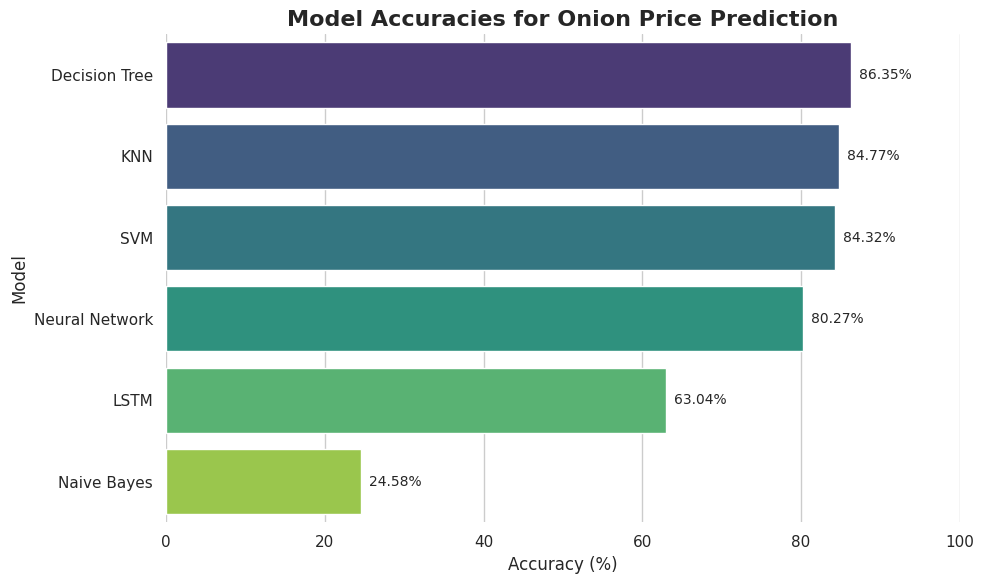

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data for model accuracies
data = {
    "Model": [
        "LSTM",
        "KNN",
        "Naive Bayes",
        "Decision Tree",
        "SVM",
        "Neural Network"
    ],
    "Accuracy (%)": [63.04, 84.77, 24.58, 86.35, 84.32, 80.27]
}

# Create a DataFrame
accuracy_df = pd.DataFrame(data)

# Sort the DataFrame by accuracy for better visualization
accuracy_df.sort_values("Accuracy (%)", ascending=False, inplace=True)

# Plot using seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=accuracy_df,
    x="Accuracy (%)",
    y="Model",
    palette="viridis",
    orient="h"
)

# Add data labels to the bars
for index, value in enumerate(accuracy_df["Accuracy (%)"]):
    plt.text(value + 1, index, f"{value:.2f}%", va='center', fontsize=10)

# Add title and labels
ax.set_title("Model Accuracies for Onion Price Prediction", fontsize=16, fontweight="bold")
ax.set_xlabel("Accuracy (%)", fontsize=12)
ax.set_ylabel("Model", fontsize=12)

# Beautify the plot
plt.xlim(0, 100)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("model_accuracies.png", format="png", dpi=300)

# Show the plot
plt.show()
